In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from __future__ import print_function
from collections import OrderedDict

import os
import sys
import timeit
import pickle


import scipy.io as sio
import numpy as np
import theano
import theano.tensor as T

sys.path.insert(0, "/home/cwhuang/DVTL/Model/")
import nnet as nn
import criteria	as er
import util
import DSSL

import OfficeFeaturePlot as fp

Using gpu device 0: GeForce GTX TITAN (CNMeM is enabled with initial size: 50.0% of memory, cuDNN 5005)


number of minibatch at one epoch: 10, batch size source : 57, target : 48 
 validation size, S:330, T:280, test size, S:220, T:190
... building the model
Encoder is constructed with hidden layer number 1
Classifier is constructed with hidden layer number 0
Decoder is constructed with hidden layer number 1
Encoder is constructed with hidden layer number 1
Classifier is constructed with hidden layer number 0
Decoder is constructed with hidden layer number 1
Encoder is constructed with hidden layer number 1
Classifier is constructed with hidden layer number 0
Decoder is constructed with hidden layer number 1
... training
Initial, test accuracy: source domain :8.181818 %, target domain 8.947368 %
epoch 1, minibatch 10/10, training loss 129.581053, validation loss 129.590220 
     epoch 1, minibatch 10/10, test accuracy of best model: source domain :20.454545 %, target domain 23.157895 %
epoch 2, minibatch 10/10, training loss 128.956228, validation loss 129.110408 
     epoch 2, minibatch 

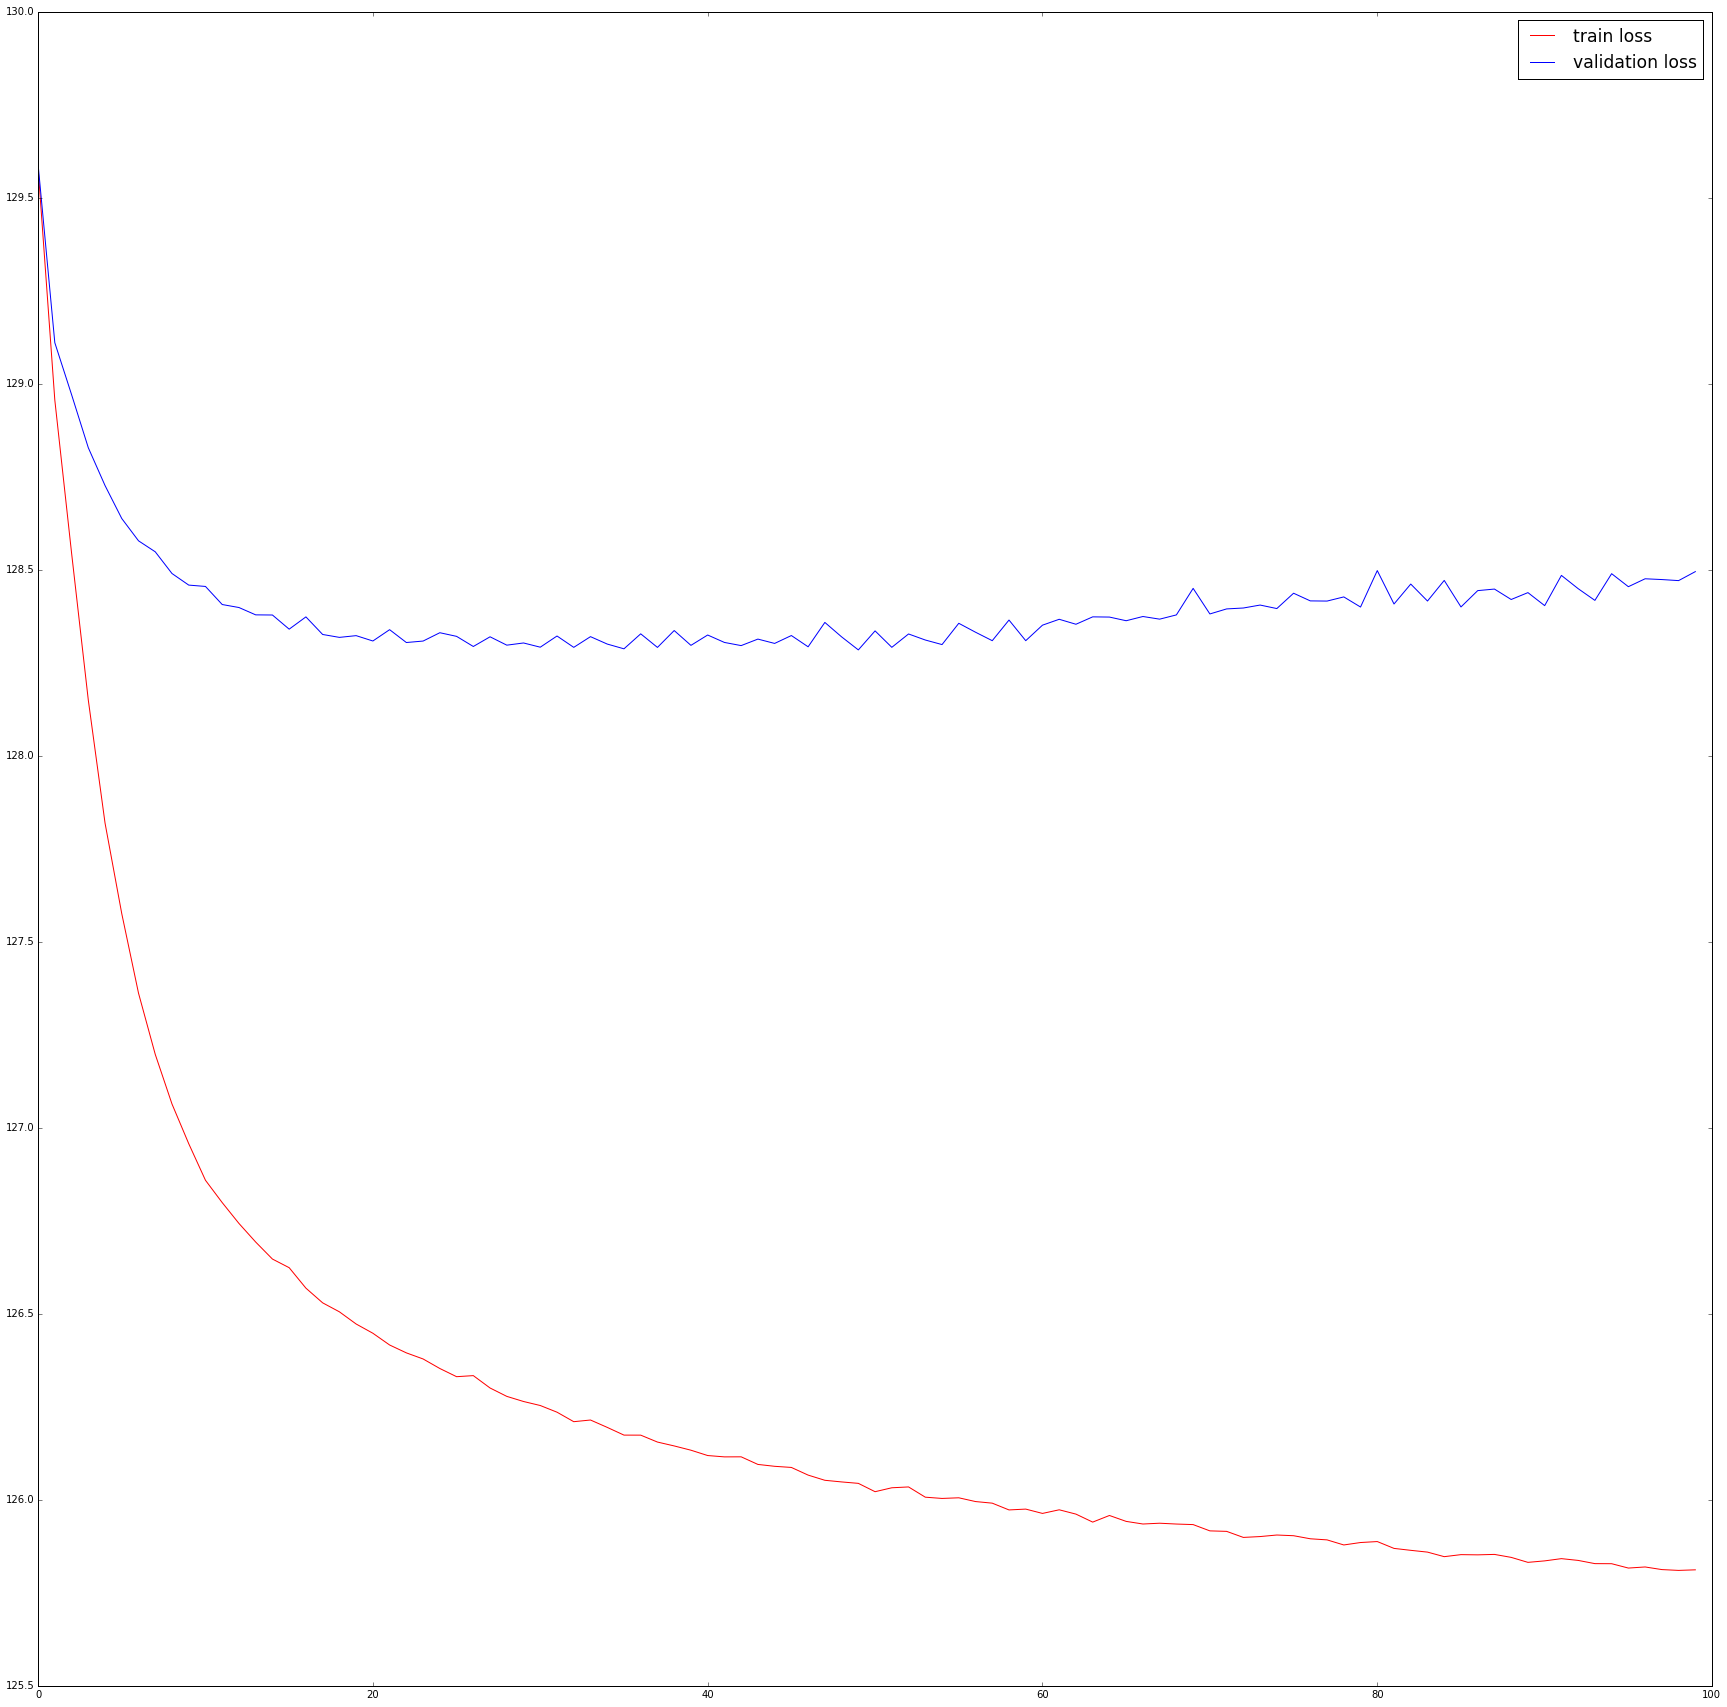

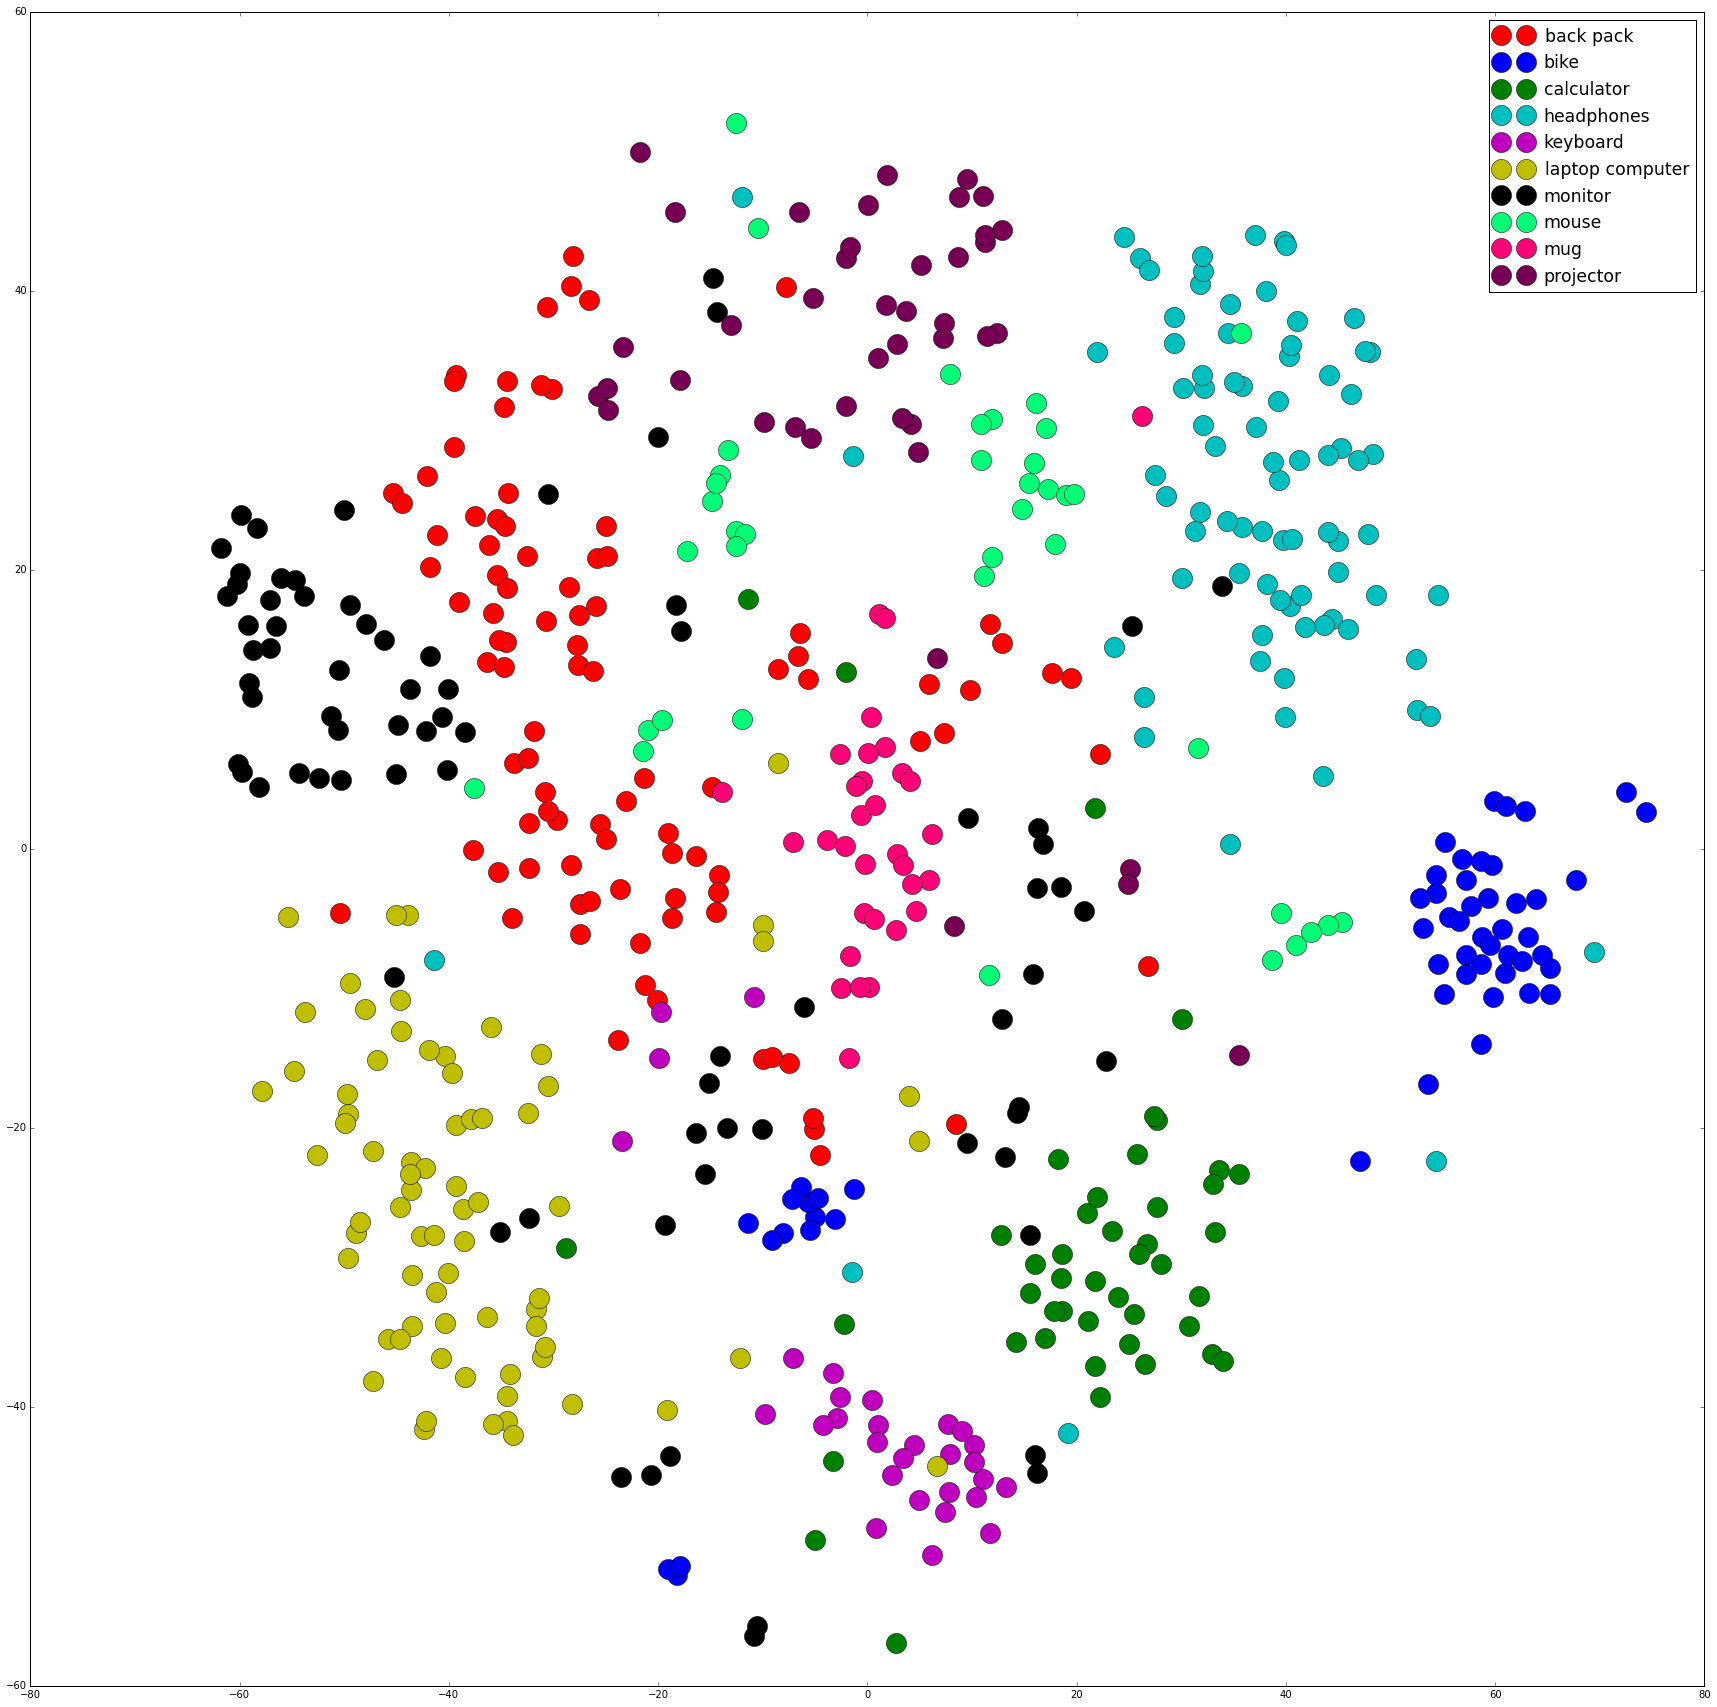

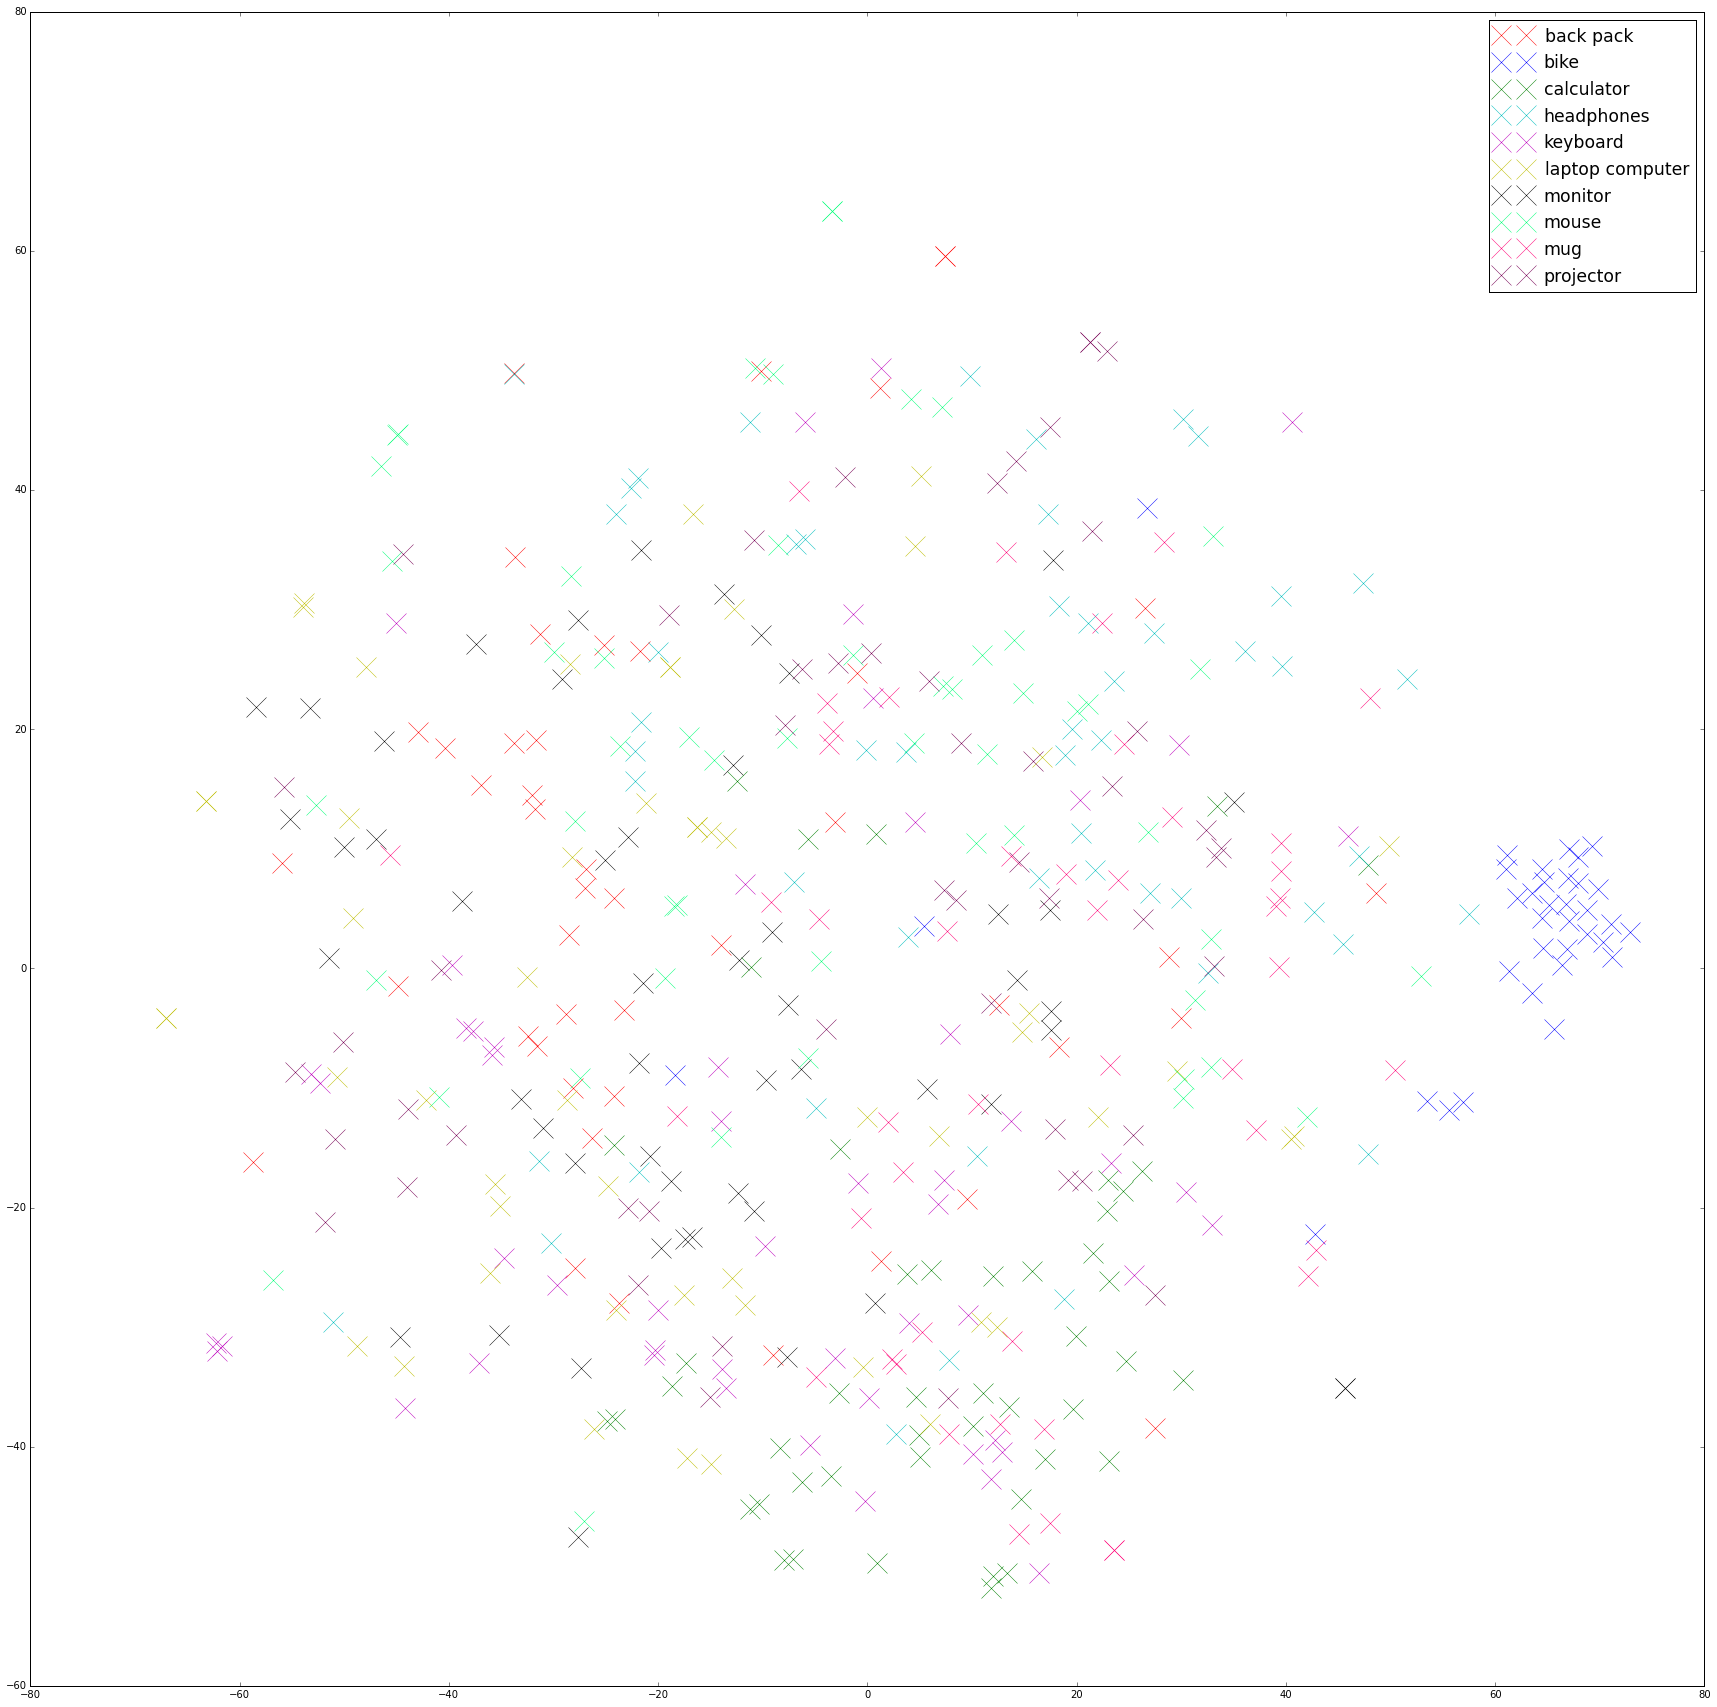

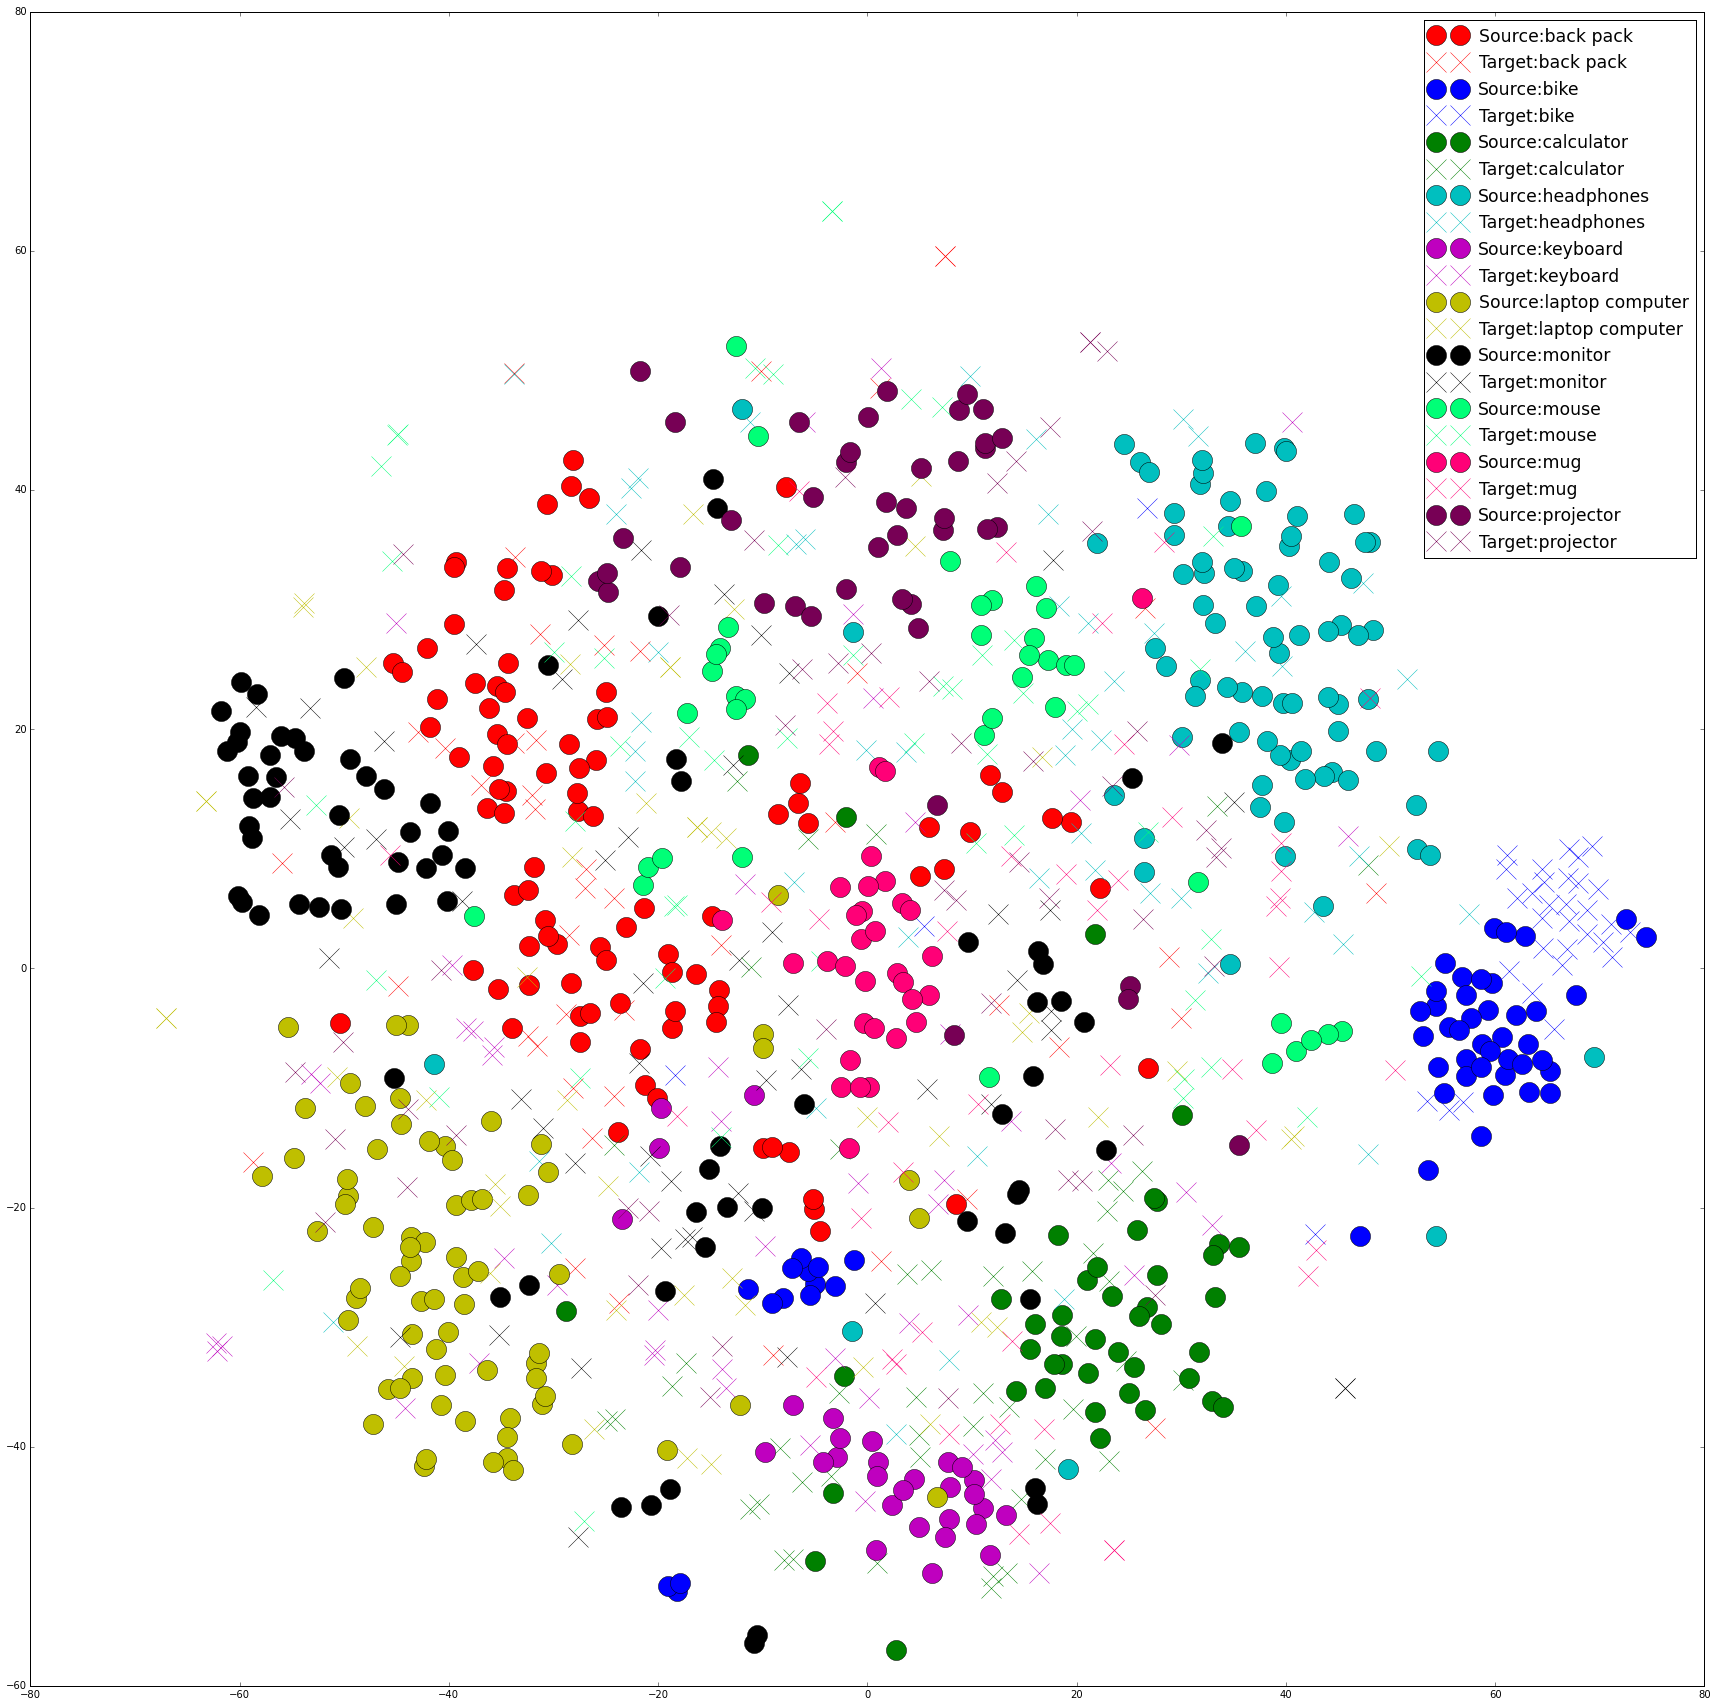

In [2]:
'''Model Construct'''
if __name__ == '__main__':
    
    source_file = '/home/cwhuang/DVTL/Dataset/Office/Caltech10_SURF_L10.npy'
    target_file = '/home/cwhuang/DVTL/Dataset/Office/amazon_SURF_L10.npy'

    source_data = np.load(source_file)
    target_data = np.load(target_file)
    
    #source_data, target_data = DataDuplicate.DataDuplicate(source_data, target_data)
    
    ########################################################################
    ###                        Coefficient Initial                       ###
    ########################################################################        

    x_dim = 800
    y_dim = 10
    z_dim = 100                #dimension of latent feature    
    h_dim = 300             #dimension of hidden unit      
    activation = T.nnet.sigmoid
    lr = 0.005

    struct = DSSL.DSSL_struct()        
    struct.encoder.layer_dim = [x_dim, h_dim, z_dim]
    struct.encoder.activation = [activation, activation]
    struct.encoder.learning_rate = [lr, lr]
    struct.encoder.decay = [1, 1]                
    struct.classifier.layer_dim = [z_dim, y_dim]
    struct.classifier.activation = [T.nnet.softmax]   
    struct.classifier.learning_rate = [lr, lr]
    struct.classifier.decay = [1, 1]
    struct.decoder.layer_dim = [z_dim, h_dim, x_dim]
    struct.decoder.activation = [activation, activation ]   
    struct.decoder.learning_rate = [lr, lr]
    struct.decoder.decay = [1, 1]    
    
    coef = DSSL.DSSL_coef(    
        alpha = 2,
        beta = 2,
        D = 500,
        optimize = 'Adam_update'        
    )        
    
    isMMD = 'MMD_'
    if coef.beta == 0:
        isMMD = ''                
    description = 'Office_DSSL_%s%s' % (isMMD, coef.optimize)
        
    features_model, test_model, trained_param = DSSL.DSSL_training(
        source_data = source_data,
        target_data = target_data,
        n_train_batches = 10,
        n_epochs=100,
        struct = struct,
        coef = coef,
        description = description
    )
    
    fp.features_plot(features_model, test_model, source_data, target_data, description)    